In [1]:
#Import package
from __future__ import print_function, division

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import thinkstats2
import thinkplot

# Cap.: 1 - Análise Exploratória dos dados

**Informação não confirmada**: São baseados em dados que são inéditos e normalmente pessoais.

Os dados de **informações não confirmadas** normalmente falha pelo seguintes problemas:

- Pequeno número de observação;

- Viés de seleção;

- Viés de confirmação;

- Inexatidão;

Alguns exemplo de dados não confirmados:

- Ocorrência de uma determinada cheia (moradores relatam que ocorre a cada 2 anos);

- Sobre um período do ano (se a cinza da fogueira do são joão amanhecer molhada, é sinal de um bom inverno no próximo ano);

## Uma abordagem estatística

São usadas algumas ferramentas estatísticas para diminuir as anetodas, essas ferramentas são:

- Coleta de dados;

- Estatísticas descritivas; 

- Análise exploratória de dados;

- Estimativa;

- Teste de hipóteses.

## Coleta de dados

### Variáveis

Nas diferentes aplicações foram utilizadas as seguintes variáveis:

- Pluviométrica;
    
- Fluviométrica;

- Evaporação;

### Fontes de dados

- **Séries de vazões naturais** (reconstituídas pela ONS);

- **Séries de vazões observadas** (ANA):
    
    - Nome da Estação: UHE MANSO JUSANTE 
    
    - Código: 66210000
    
    - Nome da Estação: FAZENDA RAIZAMA (COIMBRA)
    
    - Código: 66231000
    
- **Séries de chuvas observadas** (ANA):

    - Nome da Estação: FAZENDA RAIZAMA (COIMBRA)
    
    - Código: 01455008
    
- **Séries de Evapotranspiração** (INMET):

    - Estação: CUIABÁ
    
    - Código: 83361
    
    - Estação: DIAMANTINO
    
    - Código: 83309
    
    - Estação: PADRE RICARDO REMETTER
    
    - Código: 83364

### Importando os dados

Os dados foram tratados e exportados para um arquivo .csv

In [2]:
dados = pd.read_csv("dados_com_evap_manso.csv", index_col=0, parse_dates=True)

![](gantt_manso_com_evap.png)

# Cap.: 2 - Distribuições

Histograma para dados de vazão diária;

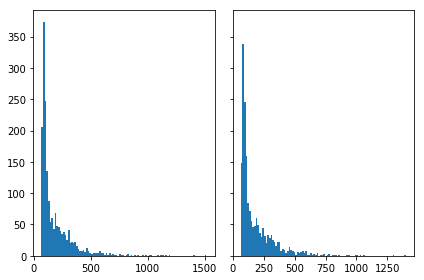

In [8]:
date_start = pd.to_datetime("01/01/1982", dayfirst=True)
date_end = pd.to_datetime("31/12/1986", dayfirst=True)
dados_ = dados.loc[date_start:date_end]
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
_ = axs[0].hist(dados_.MANSO, bins=100, label='Manso_Nat')
_ = axs[1].hist(dados_.COIMBRA_F, bins=100, label='Manso_Obs')
